In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
path=Path('data/cars')

In [4]:
path.ls()


[PosixPath('data/cars/lucidair'),
 PosixPath('data/cars/modelx'),
 PosixPath('data/cars/ff91'),
 PosixPath('data/cars/models'),
 PosixPath('data/cars/model3'),
 PosixPath('data/cars/taycan'),
 PosixPath('data/cars/rimac')]

In [5]:
classes=['models','modelx','lucidair','model3','taycan','rimac','ff91']

In [6]:
folder='lucidair'
file='lucidair.csv'

In [7]:
folder


'lucidair'

In [8]:
file

'lucidair.csv'

In [9]:
download_images(path/file,path/folder, max_pics=500)

In [6]:
for imageClass in classes:
    folder=imageClass
    file=imageClass + '.csv'
    download_images(path/file,path/folder,max_pics=700)

In [7]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True)

In [6]:
np.random.seed(42)
data=ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes


['ff91', 'lucidair', 'model3', 'models', 'modelx', 'rimac', 'taycan']

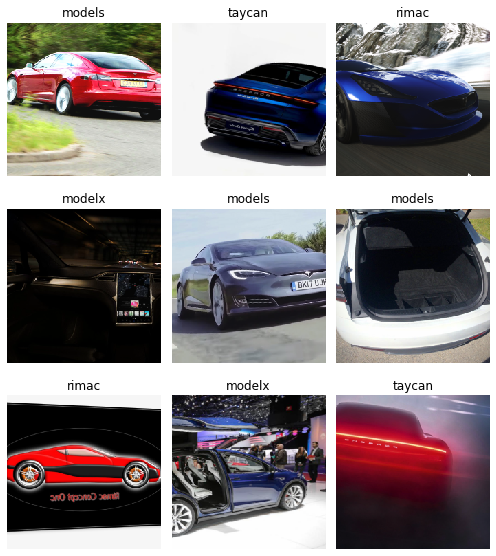

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.c, len(data.train_ds), len(data.valid_ds)

(7, 2080, 519)

### Train model

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.443392,1.368647,0.435453,01:20
1,1.872610,1.235180,0.393064,00:59
2,1.516197,1.040325,0.341040,01:00
3,1.288713,1.028149,0.339114,01:02


In [12]:
learn.save('stage-1')

In [18]:
learn.unfreeze()


In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


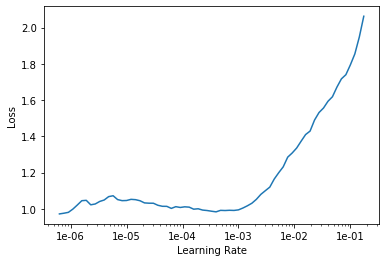

In [20]:
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.045179,0.890427,0.283237,00:57
1,0.815057,0.852974,0.263969,01:00


In [22]:
learn.save('stage-2')

### Interpretation

In [23]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (2080 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
lucidair,lucidair,lucidair,lucidair,lucidair
Path: data/cars;

Valid: LabelList (519 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
model3,lucidair,modelx,taycan,model3
Path: data/cars;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [24]:
?ClassificationInterpretation.from_learner

In [26]:
i=ClassificationInterpretation.from_learner(learn)

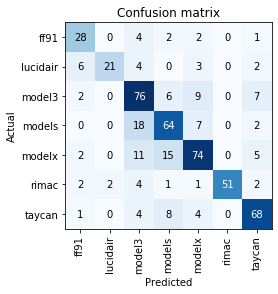

In [27]:
i.plot_confusion_matrix()

In [28]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [29]:
losses, idxs = i.top_losses()

In [30]:
len(data.valid_ds) == len(losses)==len(idxs)

True

In [31]:
len(data.valid_ds)

519

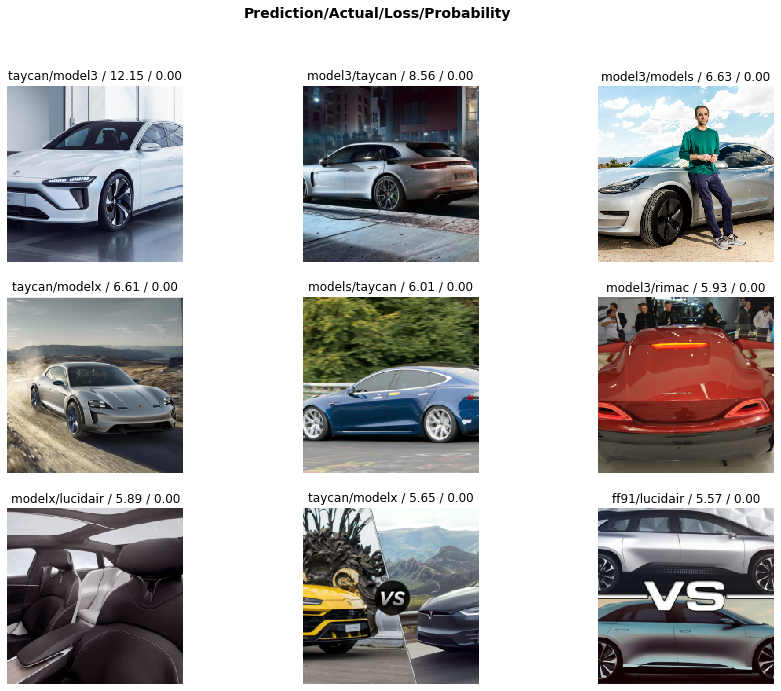

In [32]:
i.plot_top_losses(9,figsize=(15,11))